<a href="https://colab.research.google.com/github/RGTHENO/ML-Algorithms/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

np.set_printoptions(suppress=True)
DRIVE_PATH = './drive/My Drive/Colab Notebooks/TopIA/'
drive.mount('/content/drive') 

PERCENTAGE_TRAINING = 0.7
PERCENTAGE_TESTING = 0.3


DATASET_NAME_OCEAN  =  'oceano_simple.csv'
DATASET_NAME_HOME   =  'home_prices.csv' 
DATASET_NAME_PETROL =  'petrol_consumption.csv' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#dfHome  :data frame Home 1 feature
def readFiles(filename:str):

  dataframe = pd.read_csv(filename, delim_whitespace=True)
 
  #convert data from dataframe to numpy
  matrix_data = dataframe.to_numpy() 
  
  '''We are gonna assure that dtype of each element of matrix_data
  to be float64, this way it will be better to work with normalized values'''
  matrix_data = matrix_data.astype(np.float64) 
  
  return matrix_data
   


In [0]:
def normalizeData(matrix_data):

  '''calculate the 'mean' y 'stdeviation' of all rows(index 0) per Each Column'''
  #The second parameter of np.mean, means "SOBRE que eje se van a tomar 
  #los valores para aplicar la media"
  
  mean_cols = np.mean(matrix_data, 0)  
  sigma_cols = np.std(matrix_data, 0)

  for j in range(matrix_data.shape[0]): #Normalize for all columns of the jth row
      matrix_data[j] =  (matrix_data[j]-(mean_cols) )/(sigma_cols)
  
  return matrix_data

In [0]:
def partitionTrainTest(matrix_data):
  
  ''' We're gonna to generate an Random list of indices of rows(Samples)
  corresponding to our DATASET(matrix_data), so that, we can partition it '''

  indices = np.random.permutation(matrix_data.shape[0]) 
  
  m_samples = indices.size;
  
  ''' We will get the amount of samples for training based on 
  the PERCENTAGE_TRAINING '''  
  m_train =  int(m_samples*PERCENTAGE_TRAINING) 
  m_test = m_samples - m_train
  
  
  ''' We get the sublist of indices corresponding to samples for traning and testing'''
  training_idx, test_idx = indices[:m_train], indices[m_train:]

  '''training_idx will represent the list of positions of rows(samples), that we're
  going to extract from our matrix_data(dataset): '''
  train, test = matrix_data[training_idx,:], matrix_data[test_idx,:] 
  
  n_cols = train.shape[1]
  #m_train "m" represents the amount of samples(rows)
  #m_test  "m" represents the amount of samples(rows)

  #OJO: It' unnecessary to access to test.shape[1], because test (set)
  #just have 1 column "Y"

  ''' WE'LL GET X_TRAIN & Y_TRAIN '''

  '''---- As limit superior never is access, in addition to that,  it is important
  to subtract -1 because we want to avoid access UNTIL the last column(Y) '''
  X_train = train[: , :n_cols-1]

  #We are adding a column of ones at the beginning of our Matrix 
  X_train = np.c_[np.ones(m_train), X_train]  

  #We need to subtract -1 'cause we wanna access to the last column(Y) specifically 
  Y_train = train[ : , n_cols-1]
  Y_train = np.reshape(Y_train, (Y_train.shape[0] ,1))

  ''' WE'LL GET X_TEST & Y_TEST '''
  
  #The same that was happended to X_train, we must apply to X_test
  X_test = test[:,:n_cols-1]  
  #We are adding a column of ones at the beginning of our Matrix
  X_test = np.c_[np.ones(m_test), X_test] 

  Y_test = test[:,n_cols-1] 
  Y_test = np.reshape(Y_test, (Y_test.shape[0] ,1))

  return X_train, Y_train, X_test, Y_test


In [0]:
def hFunction(X, theta):
  return X.dot(theta)



In [0]:
def computeCost( X , Y, theta ):
  
  m_samples = len(Y)
  pred_Y = hFunction(X,theta)
  J = (1/(2*m_samples))*np.sum( np.square( pred_Y-Y ), axis=0)
  return J


In [0]:
def gradientDescent(X , Y , theta, n_iteration, l_rate ):

  m_samples = len(Y)
  cost_record= np.zeros(n_iteration)

  for i in range(n_iteration):
    f=  hFunction(X,theta)-Y  #return a matrix of shape--> mx1 
    theta = theta-(1/m_samples)*l_rate*X.T.dot(f)
    cost_record[i] = computeCost(X, Y, theta)
  
  return theta, cost_record


In [0]:
filename = DRIVE_PATH+DATASET_NAME_HOME
matrix_data =  readFiles(filename)  

matrix_data = normalizeData(matrix_data)

X_train, Y_train, X_test, Y_test = partitionTrainTest(matrix_data)

theta = np.zeros( ( X_train.shape[1], 1)) 

In [11]:

#print("mean X:", np.mean(X_train, axis=0))
#print("std X :", np.std(X_train, axis=0))
#print("mean Y:", np.mean(Y_train, axis=0))
#print("std Y :", np.std(Y_train, axis=0))

num_it = 1500

theta = np.zeros( ( X_train.shape[1], 1))

theta, cost_history = gradientDescent(X_train, Y_train,theta, num_it, 0.1)
print("theta final :", theta)



theta final : [[0.00358172]
 [0.79815694]]


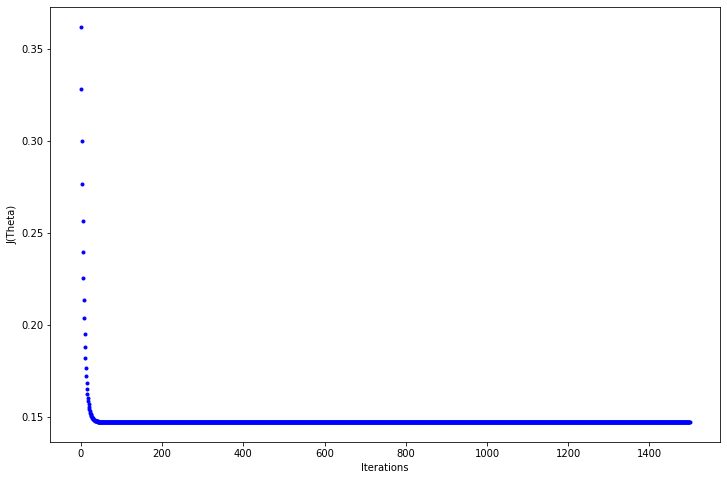

In [12]:
import matplotlib.pyplot as plt
fig,axis_fig = plt.subplots(figsize=(12,8))

axis_fig.set_ylabel('J(Theta)')
axis_fig.set_xlabel('Iterations')
axis_fig.plot(range(num_it),cost_history,'b.')

fig.savefig("standard_HOME_cost.jpg")

from google.colab import files
files.download("standard_HOME_cost.jpg")



In [0]:
def eqNormal(X, Y):
  
  dot_XX = np.dot(X.T, X)
  dot_XY = np.dot(X.T, Y)
  theta = np.linalg.inv(dot_XX).dot(dot_XY)

  return theta

In [15]:
theta_EN = eqNormal(X_train, Y_train)
print("Theta EQN :\n", theta_EN)

Theta EQN :
 [[0.00358172]
 [0.79815694]]


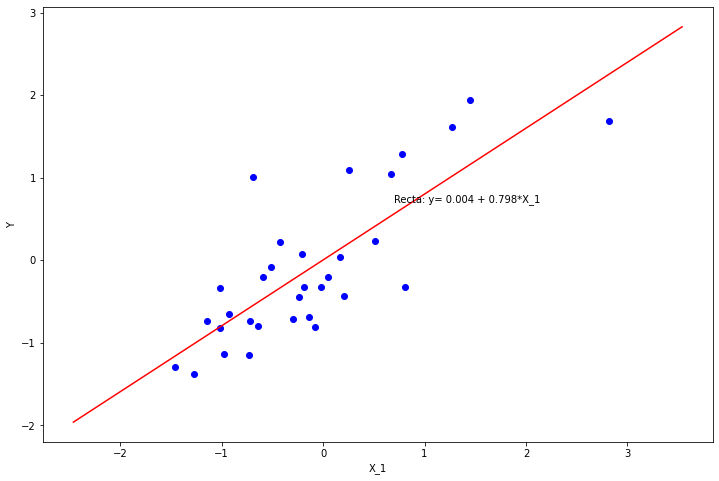

In [16]:
''' Let's plot our straight line '''
fig, axis_fig = plt.subplots(figsize=(12,8))
axis_fig.set_ylabel('Y')
axis_fig.set_xlabel('X_1')
axis_fig.plot(X_train[:, 1], Y_train[:,0],'bo' )
linea = np.arange(np.min(X_train[:,1]-1), np.max(X_train[:,1]+1))

linea = np.column_stack((np.ones(linea.shape[0]), linea))

descrip = "Recta: y= "+str(round(theta[0,0],3))+" + "+str(round(theta[1,0],3))+"*X_1"
axis_fig.plot(linea[:,1], hFunction(linea, theta), "red")#si ponia green con comillas simples solo me hubiera dibujado puntos discontinuos
axis_fig.text(0.7, 0.8, descrip, horizontalalignment='left', verticalalignment='top')
fig.show()

fig.savefig("home_line_GDC.jpg")
from google.colab import files
files.download("home_line_GDC.jpg")


In [0]:
cost_test = computeCost(X_test,Y_test, theta_EN)
print("cost_test : ", cost_test)
print("X_test.shape: ",X_test.shape)
print("Y_test.shape: ", Y_test.shape)


cost_test :  [0.12706926]
X_test.shape:  (15, 2)
Y_test.shape:  (15, 1)


In [18]:
'''We are going to do experiments #iteraciones vs learning_rate'''

theta = np.zeros( ( X_train.shape[1], 1))

n_exper_lr = 6
n_exper_it = 7  

it_lr_matrix = np.zeros((n_exper_it, n_exper_lr))

best_it= best_lr=-1
min_cost = 99999999

i=j=0
for it in range(500,4000, 500): 
  
  lr= 0.01
  
  while( lr <= 0.05):
    theta = np.zeros( ( X_train.shape[1], 1))
    theta_tmp, cost_tmp = gradientDescent(X_train,Y_train, theta, it,lr)    
    cost_avg = np.mean(cost_tmp,axis=0)
    if( cost_avg < min_cost):
      best_it = it
      best_lr = lr
      min_cost = cost_avg
    #print("para n_it:", it, " lr:", lr,"el costo es:",cost_avg)
    it_lr_matrix[i,j] = cost_avg
    lr +=0.04
    j+=1
  
  j=0
  i+=1
 
i=0
j=2 #It will start in column 2 (0-index based)
for it in range(500,4000, 500): 
  lr= 0.1
  while( lr < 0.50):
    theta_tmp, cost_tmp = gradientDescent(X_train,Y_train, theta, it,lr)    
    cost_avg = np.mean(cost_tmp,axis=0)
    if( cost_avg < min_cost):
      best_it = it
      best_lr = lr
      min_cost = cost_avg
    
    #print(" i: ", i, " j:", j)
    it_lr_matrix[i,j] = cost_avg
    lr +=0.1
    j+=1
 
  j=2
  i+=1

print(" el menor costo es :", min_cost)
print("mejores param iteracion:", best_it, " l_r:", best_lr)
print("Finalmente la matrix it vs lr :\n", it_lr_matrix)

 el menor costo es : 0.1472982618110945
mejores param iteracion: 3500  l_r: 0.4
Finalmente la matrix it vs lr :
 [[0.17869064 0.15322626 0.15004372 0.14845705 0.14793275 0.14767459]
 [0.16297116 0.1502309  0.14863963 0.1478463  0.14758415 0.14745506]
 [0.15772596 0.14923245 0.1481716  0.14764271 0.14746795 0.14738189]
 [0.15510336 0.14873322 0.14793759 0.14754092 0.14740984 0.1473453 ]
 [0.15352979 0.14843368 0.14779718 0.14747984 0.14737498 0.14732335]
 [0.15248075 0.14823399 0.14770357 0.14743913 0.14735174 0.14730872]
 [0.15173143 0.14809136 0.14763671 0.14741004 0.14733514 0.14729826]]


In [0]:
theta = np.zeros( ( X_train.shape[1], 1))

theta, cost_history = gradientDescent(X_train, Y_train,theta, best_it, best_lr)
 


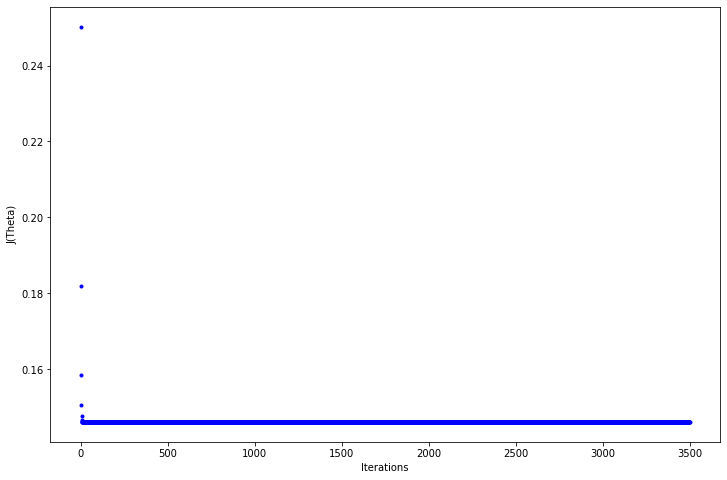

In [0]:
import matplotlib.pyplot as plt
fig,axis_fig = plt.subplots(figsize=(12,8))

axis_fig.set_ylabel('J(Theta)')
axis_fig.set_xlabel('Iterations')
axis_fig.plot(range(best_it),cost_history,'b.')
fig.savefig("home_cost.jpg")
from google.colab import files
files.download("home_cost.jpg")


In [0]:
'''APLYING SCIKIT LEARN TO VALIDATE OUR THETA LEARNED'''

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print("theta SCIKIT LEARN: \n",regressor.coef_)

[-0.07914044]
[[0.         0.84942038]]
